<a href="https://colab.research.google.com/github/Sebas9626/daggendask/blob/main/Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unlocking the Market: Exploring Correlations and Predicting Price Movements with Data Science

In this notebook, we will conduct a comprehensive market study of technology companies. Our analysis will focus on examining the correlations between various market factors and how they evolve over time. Our goal is to leverage machine learning techniques and other useful simulations to predict the future evolution of prices. Through this study, we aim to gain deeper insights into the behavior of technology markets and identify potential investment opportunities.

### Required APIs
####  and some variables as settings...

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from scipy.stats import binom
import requests
!pip install yfinance
import yfinance as yf
!pip install fmpsdk
import fmpsdk
!pip install pyfolio
import pyfolio as pf
!pip install pystan==2.19.1.1
!pip install fbprophet
from fbprophet import Prophet

today = datetime.now()
year_ago = today - timedelta(1825)
companies = ['AMZN', 'AAPL', 'MSFT', 'GOOGL', 'META', 'TSLA', 'NVDA', 'ADBE', 'CRM', 'IBM', 'ORCL', 'INTC', 'TSM', 'ACN', 'UBER']

In this project, we focus on analyzing the performance of 10 leading technology companies: Amazon (AMZN), Apple (AAPL), Microsoft (MSFT), Google (GOOGL), Facebook (META), Tesla (TSLA), NVidia (NVDA), Adobe (ADBE), Salesforce (CRM), IBM (IBM), Oracle Corporation (ORCL), Intel Corporation (INTC), Taiwan Semiconductor Manufacturing Company Limited (TSM), Accenture plc (ACN) and Uber Technologies, Inc. (UBER). Our aim is to identify correlations not only within a specific company's data but also within the group as a whole, to uncover trends and valuable insights in the market.

To begin, we will be downloading relevant data from [Yahoo Finance](https://https://finance.yahoo.com/), including information about price behavior and trading volume for the last five years. We will then calculate the simple return (SR) and the market volume change (MVC) as percentages for each company, using the 'Close Adjusted Price' and 'Volume' values.

Through this analysis, we hope to gain a deeper understanding of the market trends and behaviors within the tech industry, providing valuable insights that can inform investment decisions.

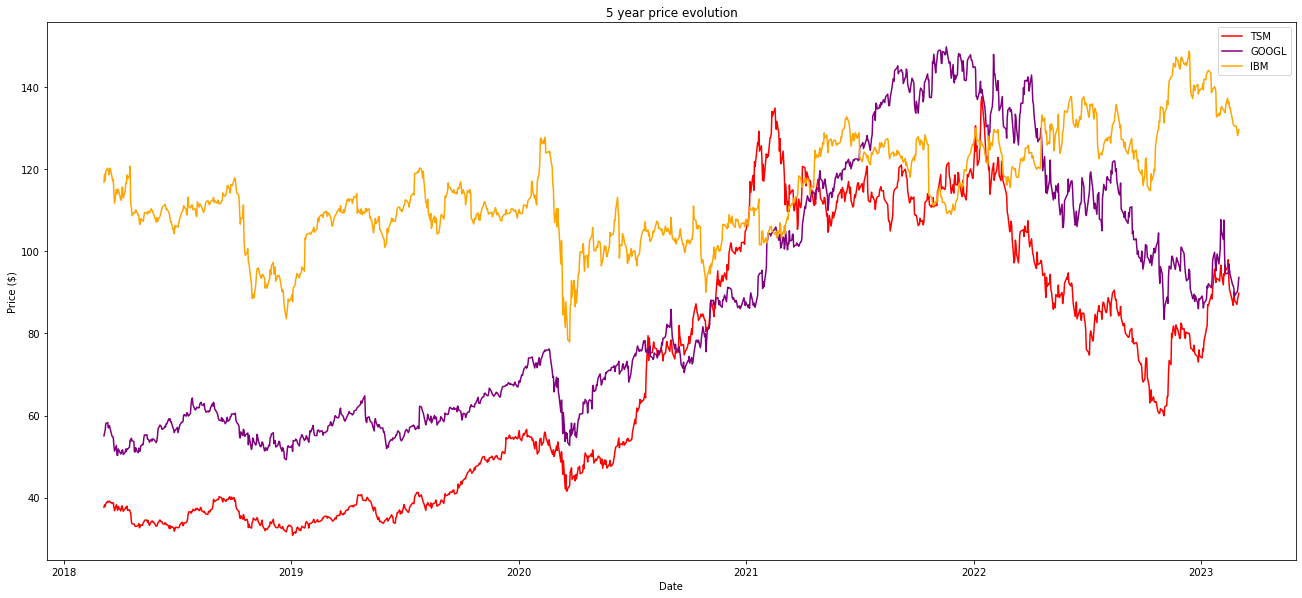

In [ ]:
company_dfs = {}
pd.options.display.float_format = '{:,.5f}'.format


for company in companies:
  
  df = yf.download(company,
              start= year_ago,
              end= today,
              progress=False)

  df = df.loc[:, ['Adj Close', 'Volume']]
  df.rename(columns={'Adj Close':'adj_close'}, inplace=True)
  df['SR_nr'] = df['adj_close'].pct_change()
  df['SR'] = round(df.adj_close.pct_change(), 2)
  df['MVC'] = round(df.Volume.pct_change(), 3)
  
  company_dfs[company] = df
  
AAPL = company_dfs['AAPL']
AMZN = company_dfs['AMZN']
MSFT = company_dfs['MSFT']
GOOGL = company_dfs['GOOGL']
META = company_dfs['META']
TSLA = company_dfs['TSLA']
NVDA = company_dfs['NVDA']
ADBE = company_dfs['ADBE']
CRM = company_dfs['CRM']
IBM = company_dfs['IBM']
ORCL = company_dfs['ORCL']
INTC = company_dfs['INTC']
TSM = company_dfs['TSM']
ACN = company_dfs['ACN']
UBER = company_dfs['UBER']

plt.plot(TSM.index, TSM['adj_close'], color='red', label='TSM')
plt.plot(GOOGL.index, GOOGL['adj_close'], color='purple', label='GOOGL')
plt.plot(IBM.index, IBM['adj_close'], color='orange', label='IBM')
plt.legend()
plt.tight_layout()
plt.title('5 year price evolution')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.rcParams["figure.figsize"] = (18,8) 
plt.show()

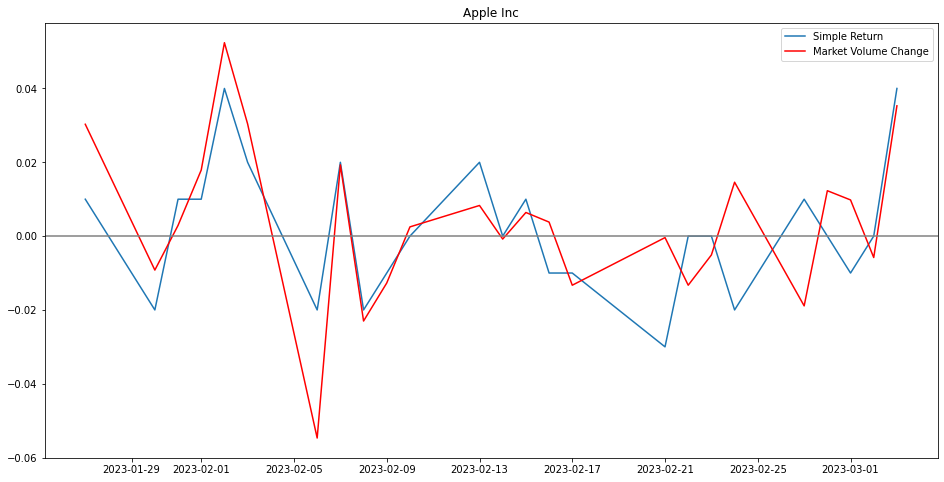

In [ ]:
plt.plot(AAPL.tail(25).index, AAPL.tail(25).SR, label='Simple Return')
plt.plot(AAPL.tail(25).index, (AAPL.tail(25).MVC)/10, label='Market Volume Change', color='red')
plt.axhline(y=0, color='gray')
plt.title('Apple Inc')
plt.legend()
plt.show()

The final graph presented in the analysis displays the simple return of the asset (Apple Inc) juxtaposed with the percentage change of the market volume over the course of the last 25 days. A noteworthy observation is that there is a strong correlation between the two datasets at certain points. To enhance the clarity of this correlation, it is imperative to note that the percentage change in market volume has been reduced by a factor of ten.

Further, certain key insights can be gleaned from the data. Notably, when there is an upward trend in the asset (positive returns) and a corresponding increase in the market volume, it can be inferred that there is a heightened interest in the asset among the general public. However, this trend may not persist as demand is likely to wane at a certain point.

## Simple Return; statistical analysis

For further statistical analysis, it is possible to model the simple return data using a normal distribution, with a mean close to zero. This approach is useful for analyzing market behavior and volatility, which is represented by the standard deviation, and identifying potential patterns.
The following graphs demonstrate how the simple return data can be modeled using a normal distribution. However, it's important to note that this data must first be transformed before it can be used in machine learning models.

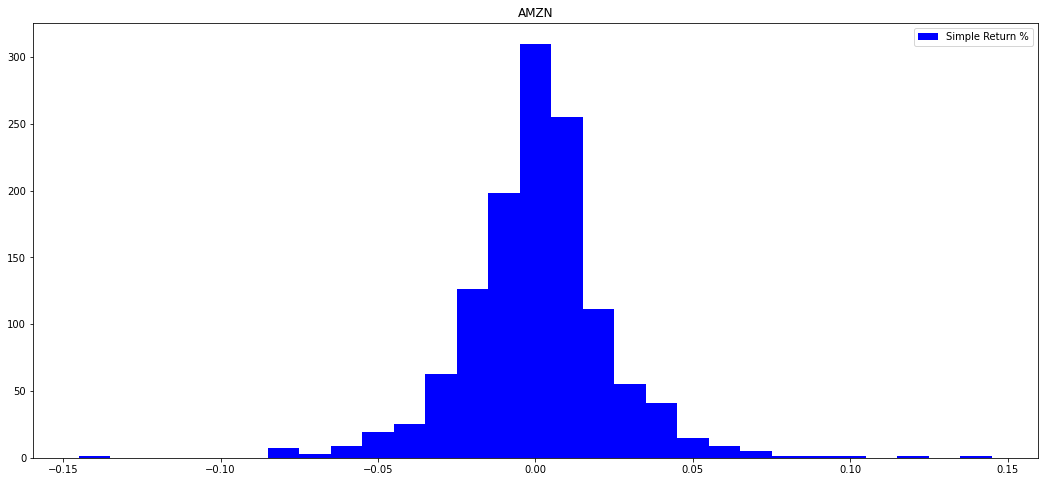

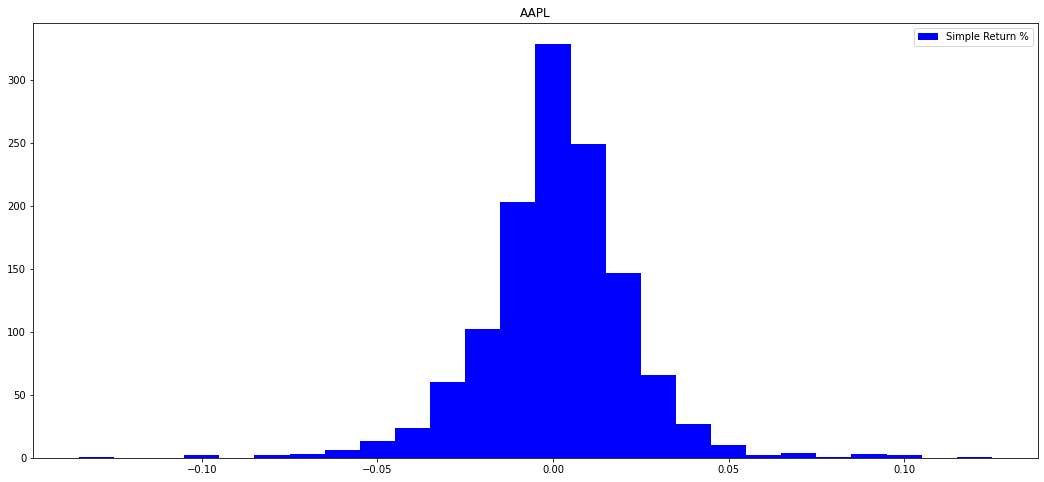

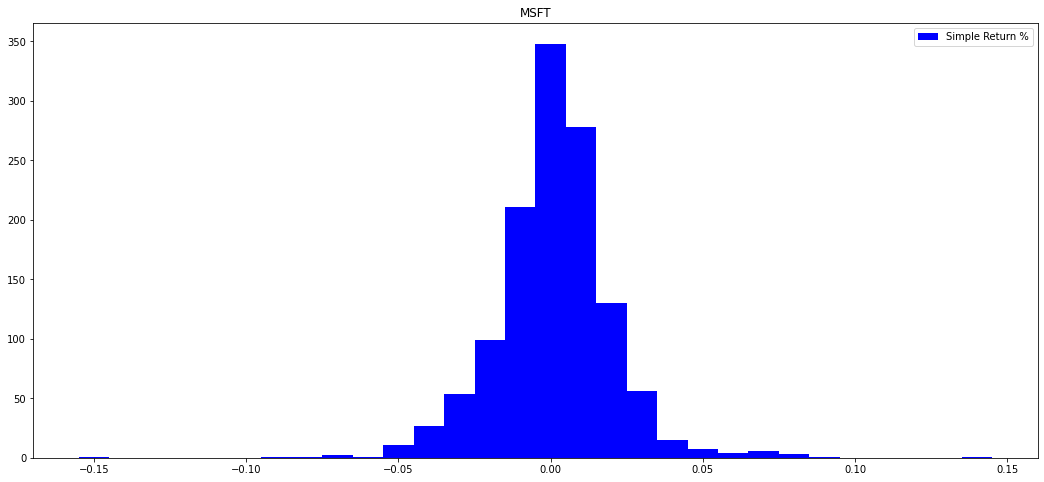

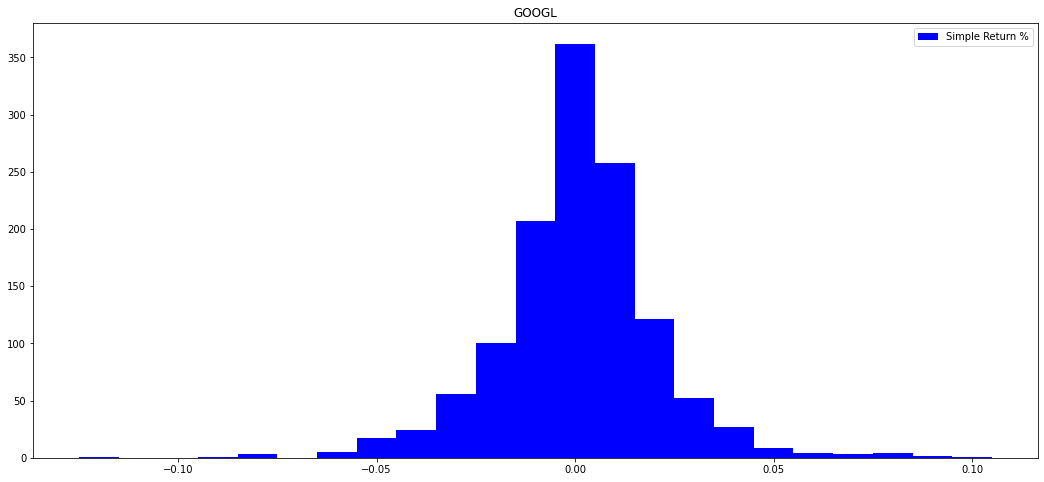

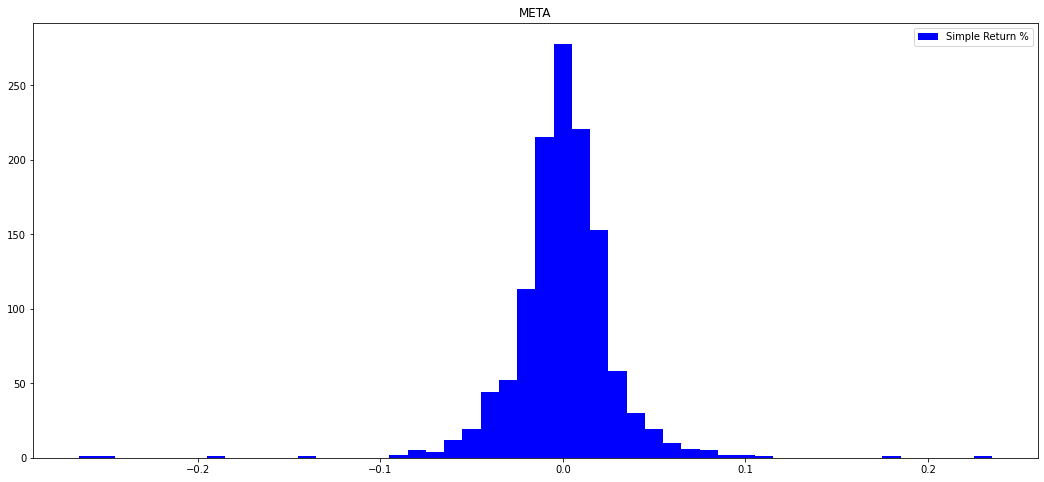

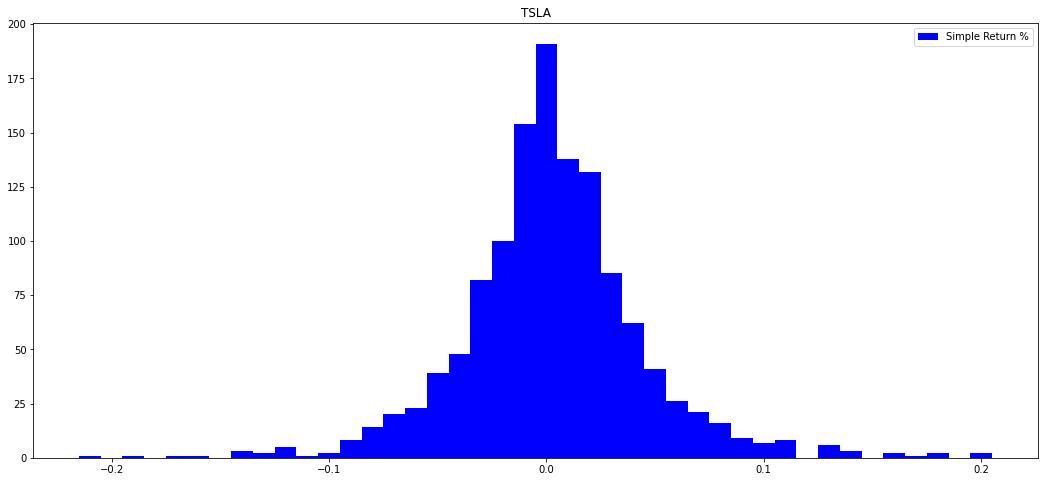

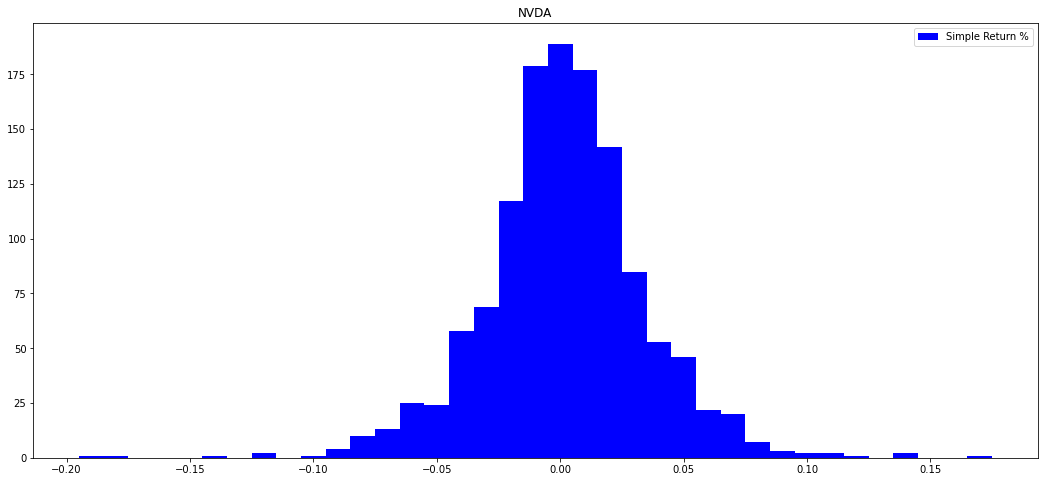

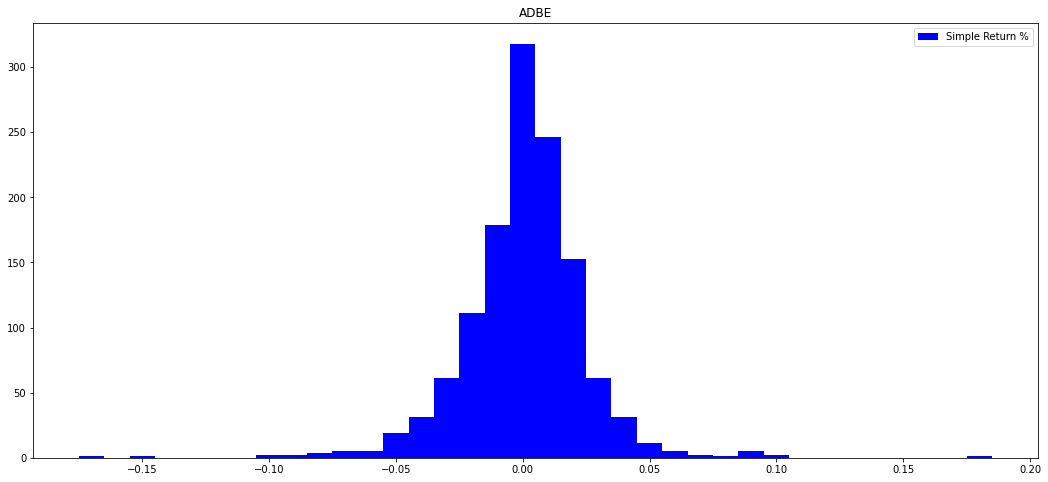

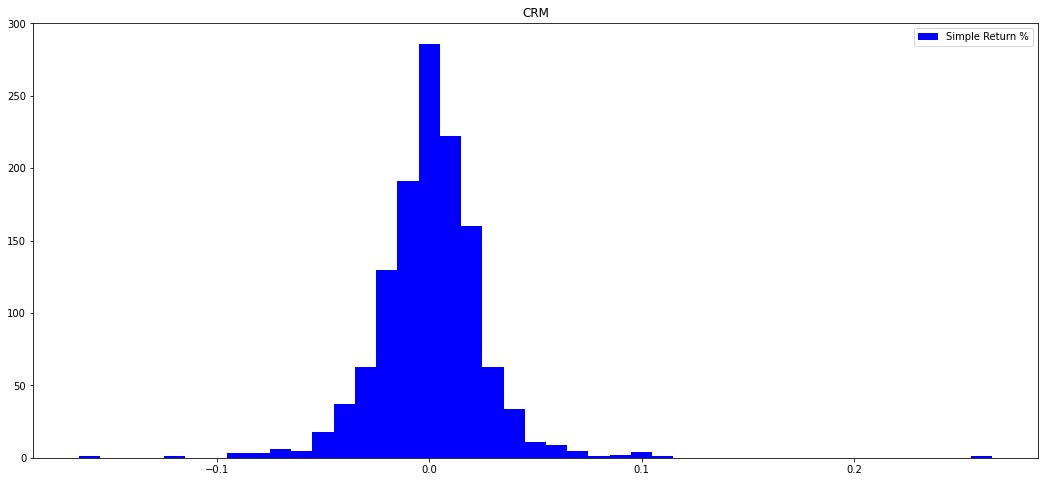

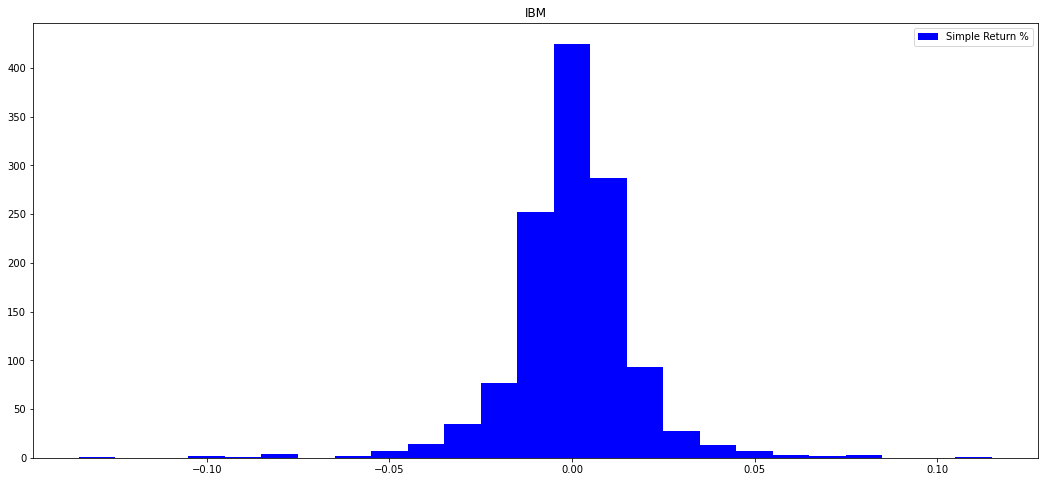

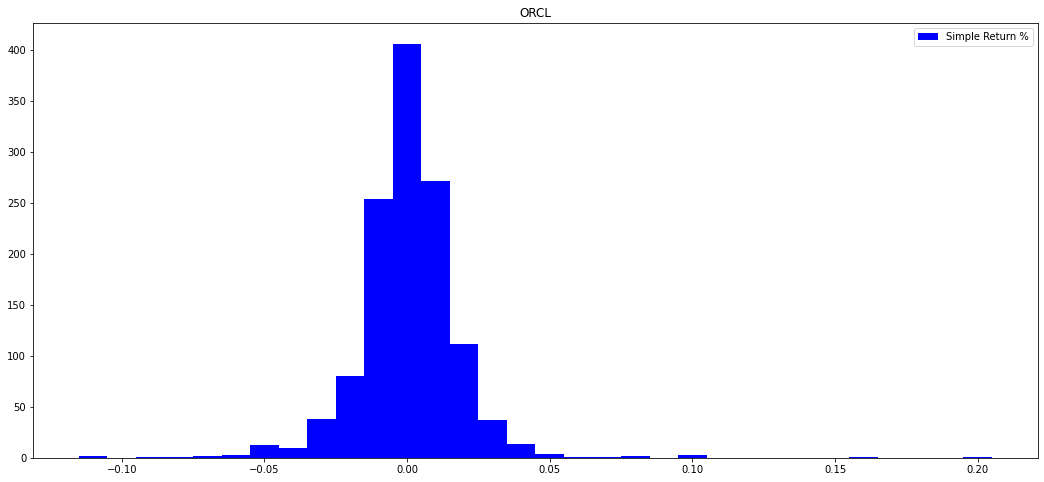

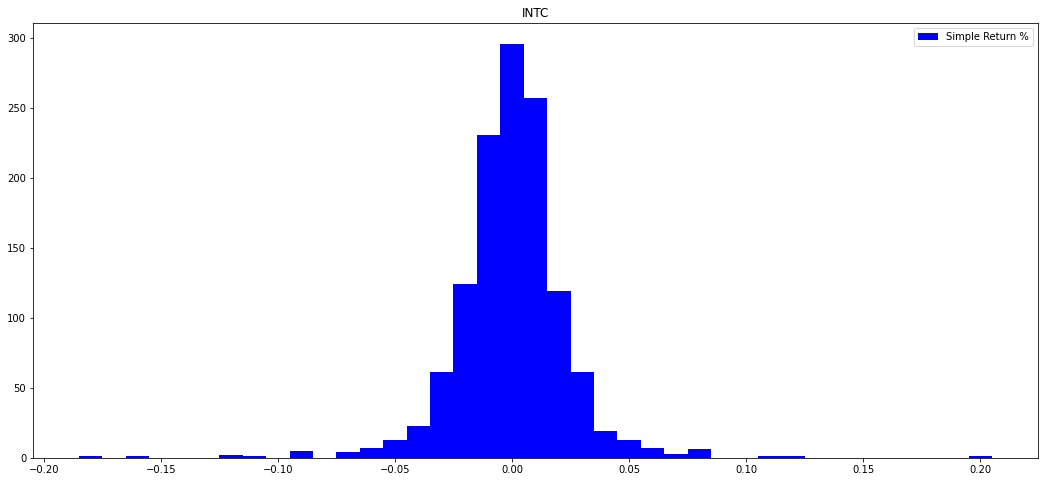

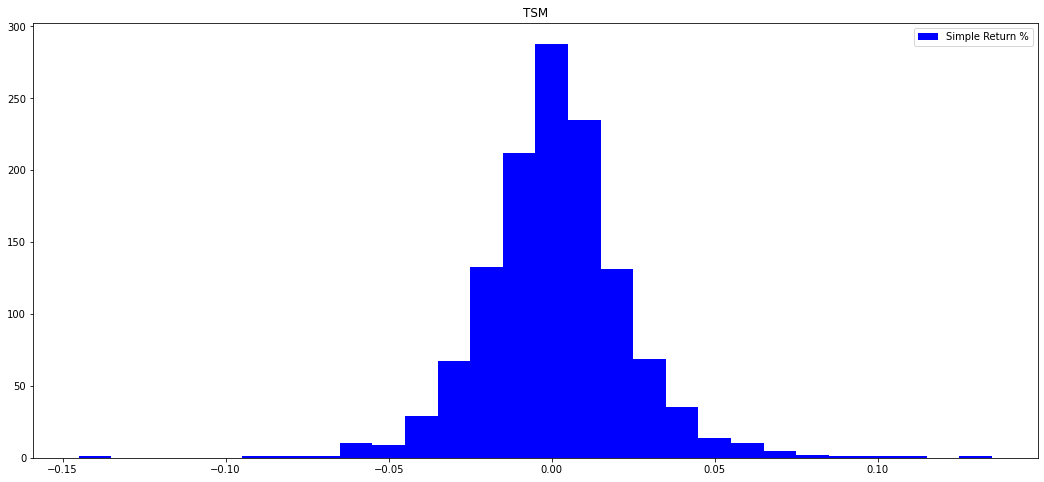

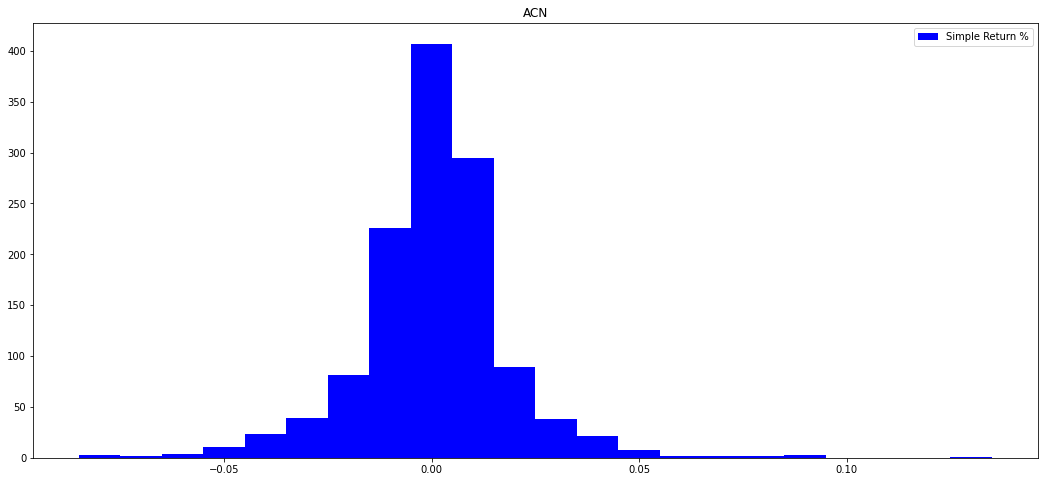

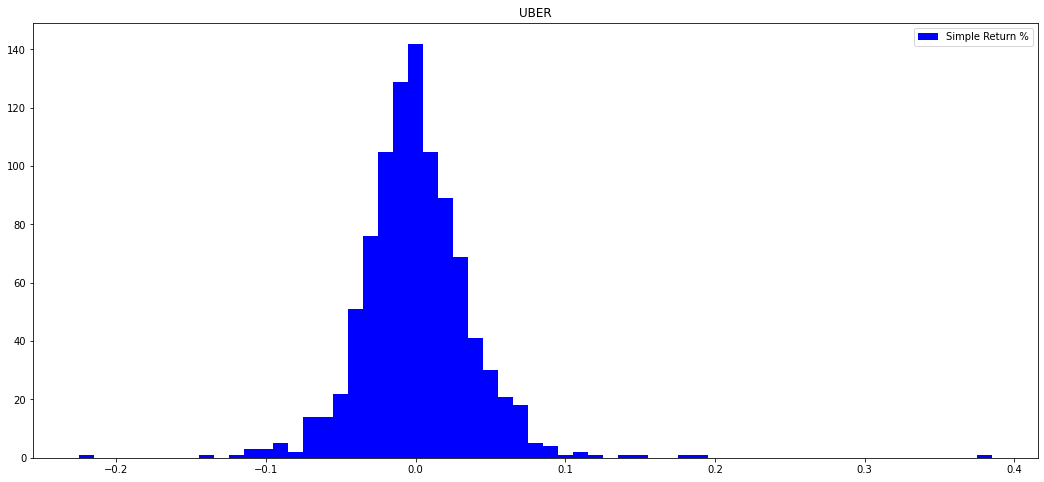

In [ ]:
for company in companies:
  sr, cr = np.unique(company_dfs[company]['SR'], return_counts=True)
  plt.bar(sr, cr, width=0.01, color='blue', label='Simple Return %')
  plt.legend()
  plt.title(company)
  plt.show()


Next, we will examine possible correlations between the selected technology companies. As these companies operate in the same industry, it is possible that news, regulations, or other current events could have a similar impact on two or more companies. To explore these possible correlations, we first create a DataFrame consisting of the simple returns for each company. We then use the Pearson correlation function to generate a matrix of resulting correlations among the companies, with values ranging from -1 to 1.

A correlation coefficient of +1 indicates a perfect positive correlation, meaning that the two variables move in the same direction with the same magnitude. Conversely, a correlation coefficient of -1 indicates a perfect negative correlation, meaning that the two variables move in opposite directions with the same magnitude.

In [ ]:
SR = {}
for company in companies:
  SR[company] = company_dfs[company]['SR_nr']

SR_df = pd.DataFrame.from_dict(SR, orient='columns')
SR_df = SR_df.dropna().reset_index(drop=True)

In [ ]:
SR_corr= SR_df.corr()
SR_corr.style.background_gradient(subset=companies, cmap='Blues')


,AMZN,AAPL,MSFT,GOOGL,META,TSLA,NVDA,ADBE,CRM,IBM,ORCL,INTC,TSM,ACN,UBER
AMZN,1.000000,0.649194,0.704830,0.673266,0.623087,0.458460,0.644460,0.662307,0.593694,0.294893,0.413425,0.467945,0.486302,0.555069,0.417178
AAPL,0.649194,1.000000,0.790160,0.707478,0.609641,0.509541,0.697253,0.698243,0.586911,0.463454,0.545357,0.612003,0.581548,0.661399,0.377127
MSFT,0.704830,0.790160,1.000000,0.810058,0.639568,0.483621,0.746627,0.805045,0.688450,0.475947,0.604668,0.643685,0.572128,0.744662,0.410599
GOOGL,0.673266,0.707478,0.810058,1.000000,0.688428,0.426720,0.672143,0.708595,0.608647,0.441360,0.499232,0.591371,0.546471,0.690936,0.437280
META,0.623087,0.609641,0.639568,0.688428,1.000000,0.356833,0.574311,0.615567,0.560282,0.281097,0.394346,0.485874,0.444065,0.550998,0.427249
TSLA,0.458460,0.509541,0.483621,0.426720,0.356833,1.000000,0.539302,0.463080,0.452187,0.201844,0.228681,0.374496,0.434432,0.381665,0.425298
NVDA,0.644460,0.697253,0.746627,0.672143,0.574311,0.539302,1.000000,0.703742,0.616924,0.359899,0.475134,0.619112,0.667227,0.603733,0.484812
ADBE,0.662307,0.698243,0.805045,0.708595,0.615567,0.463080,0.703742,1.000000,0.728377,0.363761,0.539152,0.576836,0.538672,0.661260,0.432660
CRM,0.593694,0.586911,0.688450,0.608647,0.560282,0.452187,0.616924,0.728377,1.000000,0.335514,0.465561,0.470936,0.467727,0.603459,0.466040
IBM,0.294893,0.463454,0.475947,0.441360,0.281097,0.201844,0.359899,0.363761,0.335514,1.000000,0.518841,0.529017,0.394618,0.597519,0.262001


Based on the correlation matrix seen earlier, we observe a significant correlation of 0.81 between Microsoft (MSFT) and Google (GOOGL).

Subsequently, we will analyze how both assets have performed in the last 40 days, and how these companies have exhibited similar upward and downward trends.

This correlation analysis is crucial when constructing a diversified portfolio, as suggested by the Modern Portfolio Theory. A lower correlation among companies leads to a more diversified portfolio.

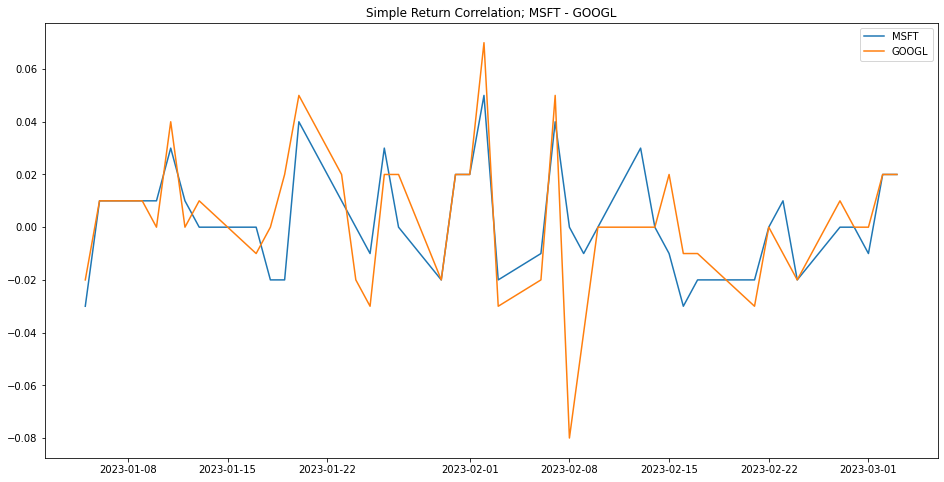

In [ ]:
MSFT_40 = MSFT.tail(40)
GOOGL_40 = GOOGL.tail(40)

plt.plot(MSFT_40.index, MSFT_40['SR'], label='MSFT')
plt.plot(GOOGL_40.index, GOOGL_40['SR'], label='GOOGL')
plt.title('Simple Return Correlation; MSFT - GOOGL')
plt.rcParams["figure.figsize"] = (15,5)
plt.legend()
plt.show()

In order to gain a deeper understanding of the technology market and make predictions based on different models, it's important to analyze various metrics from the companies.

# Financial Analysis

To get a better sense of the financial situation of the companies, we used [Financial Modeling Prep](https://https://site.financialmodelingprep.com/) to download relevant information such as the income statement, balance sheet, cash flow, and key metrics for each company.

The subsequent code downloads key indicators for each company over the last five years and organizes this information into a dictionary of DataFrames, with each DataFrame containing data for a specific company.

In [ ]:
pd.options.display.float_format = '{:,.4f}'.format

# FinancialModelingPrep API Key to download data, there is only 250 daily requests per APIkey so, be smart
# (90 requests per 'Ctrl+Enter')
#api ='24403e7280a422c43617dea0aa845275'
#api ='025d7a8b88937128d343410481e169cf'
api ='fcff3764d2f9decb3ac3cb8d9f9e9ede'

financials ={}

# IS for Income Statement, BS for Balance Sheet, CF for Cash Flow

for item in companies:
        
        IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{item}?limit=120&apikey={api}').json()
        BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{item}?limit=120&apikey={api}').json()
        CF = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{item}?limit=120&apikey={api}').json()
        Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{item}?limit=120&apikey={api}').json()
        key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{item}?limit=120&apikey={api}').json()
        profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{item}?limit=120&apikey={api}').json()
        millions = 1000000

        years = [2022, 2021, 2020, 2019, 2018]
        
        financials[item]= {}
        
        for i,year in enumerate(years):
          financials[item][year] ={}

          # key indicators

          financials[item][year]['Mkt Cap'] = key_Metrics[i]['marketCap'] / millions  
          financials[item][year]['Debt to Equity'] = key_Metrics[i]['debtToEquity']  
          financials[item][year]['Debt to Assets'] = key_Metrics[i]['debtToAssets']  
          financials[item][year]['Revenue per Share'] = key_Metrics[i]['revenuePerShare']  
          financials[item][year]['NI per Share'] = key_Metrics[i]['netIncomePerShare']  
          financials[item][year]['Revenue'] = IS[i]['revenue'] / millions  
          financials[item][year]['Gross Profit'] = IS[i]['grossProfit'] /millions  
          financials[item][year]['R&D Expenses'] = IS[i]['researchAndDevelopmentExpenses'] / millions  
          financials[item][year]['Op Expenses'] = IS[i]['operatingExpenses'] / millions  
          financials[item][year]['Op Income'] = IS[i]['operatingIncome'] / millions  
          financials[item][year]['Net Income'] = IS[i]['netIncome'] / millions  
          financials[item][year]['Cash'] = BS[i]['cashAndCashEquivalents'] / millions  
          financials[item][year]['Inventory'] = BS[i]['inventory'] / millions  
          financials[item][year]['Cur Assets'] = BS[i]['totalCurrentAssets'] / millions  
          financials[item][year]['LT Assets'] = BS[i]['totalNonCurrentAssets'] / millions  
          financials[item][year]['Int Assets'] = BS[i]['intangibleAssets'] / millions  
          financials[item][year]['Total Assets'] = BS[i]['totalAssets'] / millions  
          financials[item][year]['Cur Liab'] = BS[i]['totalCurrentLiabilities'] / millions  
          financials[item][year]['LT Debt'] = BS[i]['longTermDebt'] / millions  
          financials[item][year]['LT Liab'] = BS[i]['totalNonCurrentLiabilities'] / millions  
          financials[item][year]['Total Liab'] = BS[i]['totalLiabilities'] / millions  
          financials[item][year]['SH Equity'] = BS[i]['totalStockholdersEquity'] / millions  
          financials[item][year]['OA Cash'] = CF[i]['netCashProvidedByOperatingActivities'] / millions  
          # financials[item][year]['IA Cash'] = CF[i]['netCashUsedForInvestingActivities'] / millions  
          financials[item][year]['FA Cash'] = CF[i]['netCashUsedProvidedByFinancingActivities'] / millions  
          financials[item][year]['CAPEX'] = CF[i]['capitalExpenditure'] / millions  
          financials[item][year]['FCF'] = CF[i]['freeCashFlow'] / millions  
          financials[item][year]['Dividends Paid'] = CF[i]['dividendsPaid'] / millions  
          
          # INDICADORES DEL ESTADO DE RESULTADOS  

          financials[item][year]['Gross Profit Margin'] = Ratios[i]['grossProfitMargin']  
          financials[item][year]['Op Margin'] = Ratios[i]['operatingProfitMargin']  
          financials[item][year]['Int Coverage'] = Ratios[i]['interestCoverage']  
          financials[item][year]['Net Profit Margin'] = Ratios[i]['netProfitMargin']  
          financials[item][year]['Dividend Yield'] = Ratios[i]['dividendYield']  

          # INDICADORES DEL ESTADO DE SITUACION FINANCIERA  

          financials[item][year]['Current Ratio'] = Ratios[i]['currentRatio']  
          financials[item][year]['Operating Cycle'] = Ratios[i]['operatingCycle']  
          financials[item][year]['Days of AP Outstanding'] = Ratios[i]['daysOfPayablesOutstanding']  
          financials[item][year]['Cash Conversion Cycle'] = Ratios[i]['cashConversionCycle']  

          # INDICADORES DE RENTABILIDAD  

          financials[item][year]['ROA'] = Ratios[i]['returnOnAssets']  
          financials[item][year]['ROE'] = Ratios[i]['returnOnEquity']  
          financials[item][year]['ROCE'] = Ratios[i]['returnOnCapitalEmployed']  

          # INDICADORES DE PRECIO  

          financials[item][year]['PE'] = Ratios[i]['priceEarningsRatio']  
          financials[item][year]['PS'] = Ratios[i]['priceToSalesRatio']  
          financials[item][year]['PB'] = Ratios[i]['priceToBookRatio']  
          financials[item][year]['Price to FCF'] = Ratios[i]['priceToFreeCashFlowsRatio']  
          financials[item][year]['PEG'] = Ratios[i]['priceEarningsToGrowthRatio']  
          financials[item][year]['EPS'] = IS[i]['eps'] 


In [ ]:
# Financial Dataframe per company
AMZN_fin = pd.DataFrame.from_dict(financials['AMZN'], orient='index')
AAPL_fin = pd.DataFrame.from_dict(financials['AAPL'], orient='index')
MSFT_fin = pd.DataFrame.from_dict(financials['MSFT'], orient='index')
GOOGL_fin = pd.DataFrame.from_dict(financials['GOOGL'], orient='index')
META_fin = pd.DataFrame.from_dict(financials['META'], orient='index')
TSLA_fin = pd.DataFrame.from_dict(financials['TSLA'], orient='index')
NVDA_fin = pd.DataFrame.from_dict(financials['NVDA'], orient='index')
ADBE_fin = pd.DataFrame.from_dict(financials['ADBE'], orient='index')
CRM_fin = pd.DataFrame.from_dict(financials['CRM'], orient='index')
IBM_fin = pd.DataFrame.from_dict(financials['IBM'], orient='index')
ORCL_fin = pd.DataFrame.from_dict(financials['ORCL'], orient='index')
INTC_fin = pd.DataFrame.from_dict(financials['ADBE'], orient='index')
TSM_fin = pd.DataFrame.from_dict(financials['TSM'], orient='index')
ACN_fin = pd.DataFrame.from_dict(financials['ACN'], orient='index')
UBER_fin = pd.DataFrame.from_dict(financials['UBER'], orient='index')

AMZN_fin

,Mkt Cap,Debt to Equity,Debt to Assets,Revenue per Share,NI per Share,Revenue,Gross Profit,R&D Expenses,Op Expenses,Op Income,...,Cash Conversion Cycle,ROA,ROE,ROCE,PE,PS,PB,Price to FCF,PEG,EPS
2022,"855,876.0000",2.1681,0.6844,50.4449,-0.2672,"513,983.0000","67,640.0000",0.0000,"55,392.0000","12,248.0000",...,-6.8770,-0.0059,-0.0186,0.0399,-314.4291,1.6652,5.8604,-50.6645,2.4702,-0.9000
2021,"1,687,176.0400",2.0421,0.6713,46.4251,3.2968,"469,822.0000","66,315.0000","56,052.0000","41,436.0000","24,879.0000",...,-16.0792,0.0793,0.2413,0.0894,50.5688,3.5911,12.2042,-114.5712,0.8764,3.2980
2020,"1,628,465.0000",2.4388,0.7092,38.6064,2.1331,"386,064.0000","94,240.0000","42,740.0000","71,341.0000","22,899.0000",...,-37.7638,0.0664,0.2284,0.1175,76.3426,4.2181,17.4346,62.8169,0.9320,2.0913
2019,"912,832.9600",2.6295,0.7245,28.3929,1.1729,"280,522.0000","74,754.0000","35,931.0000","60,213.0000","14,541.0000",...,-20.2521,0.0514,0.1867,0.1058,78.7740,3.2541,14.7089,42.1573,5.5761,1.1496
2018,"731,459.3900",2.7348,0.7323,23.9104,1.0342,"232,887.0000","59,704.0000","28,837.0000","47,283.0000","12,421.0000",...,-18.1599,0.0619,0.2313,0.1318,72.6158,3.1408,16.7962,42.2907,0.3319,1.0073


In [ ]:
# Financial Dataframes
fin_dfs = [AMZN_fin, AAPL_fin, MSFT_fin, GOOGL_fin, META_fin, TSLA_fin, NVDA_fin, ADBE_fin, CRM_fin, IBM_fin, ORCL_fin, INTC_fin, TSM_fin, ACN_fin, UBER_fin]

In the previous step, we downloaded various financial metrics for the companies over the last 5 years, including financial state, performance, price, and other key indicators. These metrics are essential for comparing the current and historical situations among the companies.

To compare the price indicators of the companies for a specific year, we have created a function called **priceRatios**. This function is designed to analyze and compare the price indicators among the companies, providing valuable insights into their relative performance.

In [ ]:
def priceRatios(year): 
  PR_df = {}
  for i, company in enumerate(companies):
    PR_df[company] = {}
    PR_df[company]['P/S Ratio'] = financials[company][year]['PS']
    PR_df[company]['P/E Ratio'] = financials[company][year]['PE']
    PR_df[company]['P/B Ratio'] = financials[company][year]['PB']
    PR_df[company]['P/FCF Ratio'] = financials[company][year]['Price to FCF']
  
  PR_df = pd.DataFrame.from_dict(PR_df, orient='columns')
  plt.figure(figsize=(20,10))
  x1 = PR_df.columns
  y1 = PR_df.iloc[0,]
  plt.bar(x1, y1)
  plt.title('Price to Sales Ratio')
  plt.show()

  plt.figure(figsize=(20,10))
  x1 = PR_df.columns
  y1 = PR_df.iloc[1,]
  plt.bar(x1, y1, color='red')
  plt.title('Price to Earnings Ratio')
  plt.show()

  plt.figure(figsize=(20,10))
  x1 = PR_df.columns
  y1 = PR_df.iloc[2,]
  plt.bar(x1, y1, color='yellow')
  plt.title('Price to Book Ratio')
  plt.show()
  return PR_df

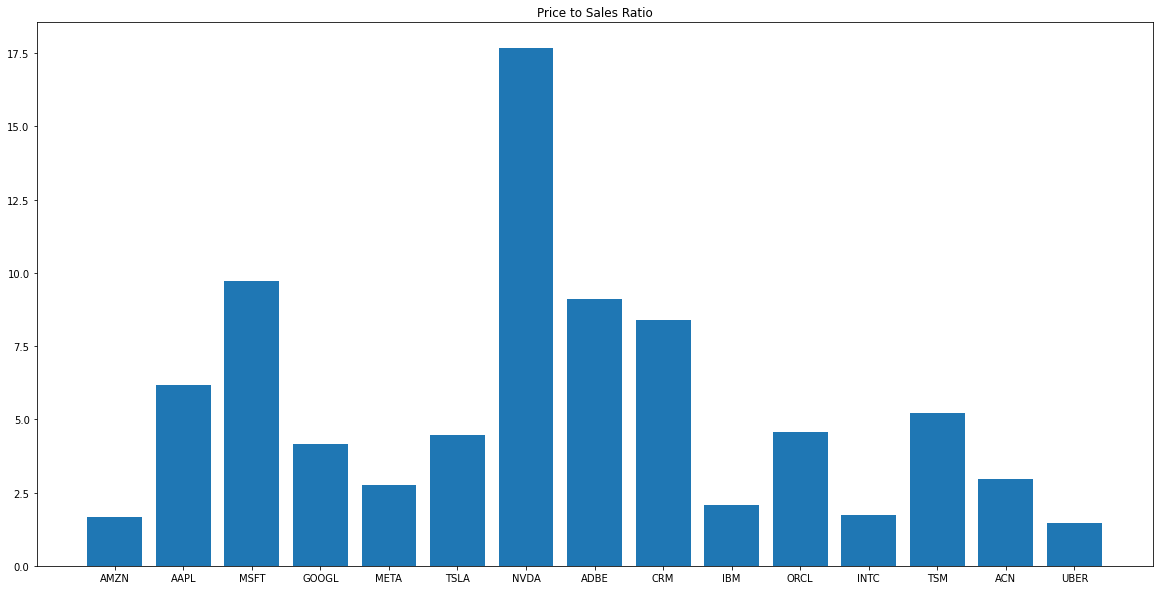

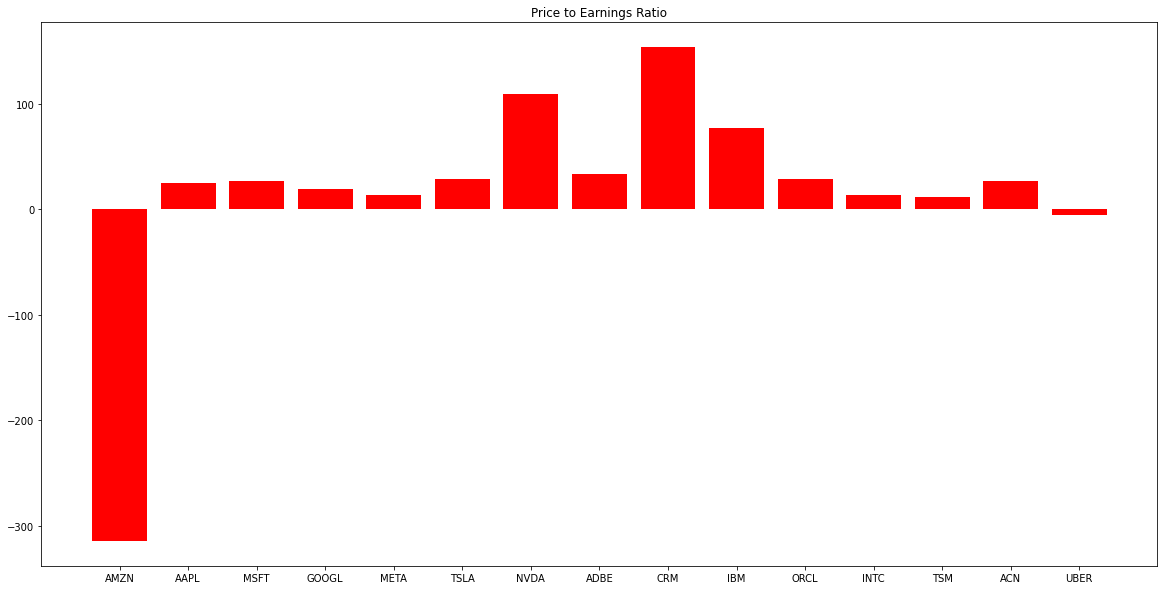

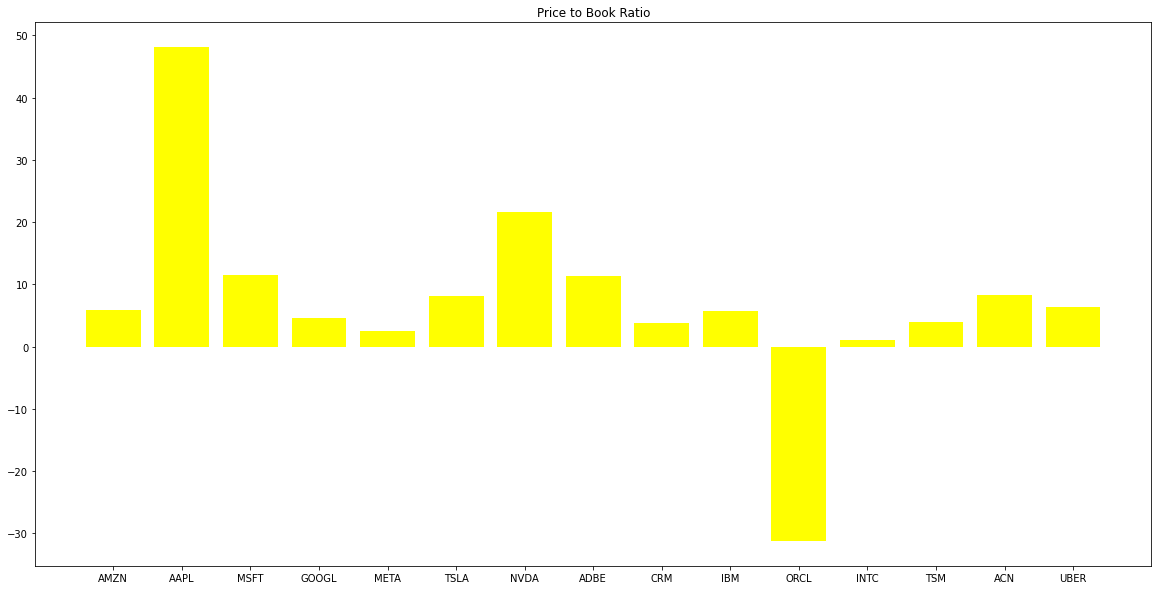

,AMZN,AAPL,MSFT,GOOGL,META,TSLA,NVDA,ADBE,CRM,IBM,ORCL,INTC,TSM,ACN,UBER
P/S Ratio,1.6652,6.1861,9.7100,4.1654,2.7730,4.4728,17.6673,9.1173,8.3860,2.0855,4.5755,1.7219,5.2172,2.9634,1.4682
P/E Ratio,-314.4291,24.4418,26.4676,19.6447,13.9377,28.9570,109.1023,33.7509,153.8516,77.0202,28.9093,13.5481,11.6190,26.5410,-5.1201
P/B Ratio,5.8604,48.1403,11.5598,4.5995,2.5722,8.1506,21.5628,11.4240,3.8217,5.7526,-31.2193,1.0705,3.9929,8.2569,6.3764
P/FCF Ratio,-50.6645,21.8889,29.5507,19.6323,16.9793,48.2477,125.1468,21.7035,42.0522,14.7214,38.6205,-11.2898,22.6050,20.6873,120.0068


In [ ]:
+priceRatios(2022)

In the previous section, we analyzed the price indicators for each company in 2022. The first graph displays the Price-Sales ratio, which compares the asset price to the total income of the company. This indicator is useful when evaluating startups that have not yet generated profits.

However, since all the selected companies are well-established global firms, we focus on the second and third graphs. The second graph shows the Price-Earnings ratio, which represents the cost per profits unit and indicates how much investors are willing to pay for each unit of earnings. A high P/E ratio can be interpreted as an indicator of upward future expectations among investors, but some experts believe it can also be an overrated indicator. META, INTC and TSM had the most favorable P/E ratio, while AMZN had a negative P/E due to its net loss. It's important to note that price indicators are not always an accurate measure of a company's financial health, but rather a way to approach its financial data.

Lastly, we have the Price-Book ratio, which compares the price to the book value per share. A low P/B ratio could indicate that the company is undervalued compared to its book value, making it a potentially attractive investment opportunity. In this sense, INTC had the most favorable P/B ratio

## Market Capitalization

The market capitalization is also an important factor to study. The Market capitalization is a measure of the total value of a company's outstanding shares of stock. It is calculated by multiplying the number of outstanding shares by the current market price per share. Essentially, market capitalization reflects the total value that investors place on a company based on its stock price. 

It is an important metric used by investors to evaluate and compare companies, as it provides a sense of the company's overall size and the level of investment interest in its stock. This metric is analyzed and its evolution per company over the years is displayed in the following section.

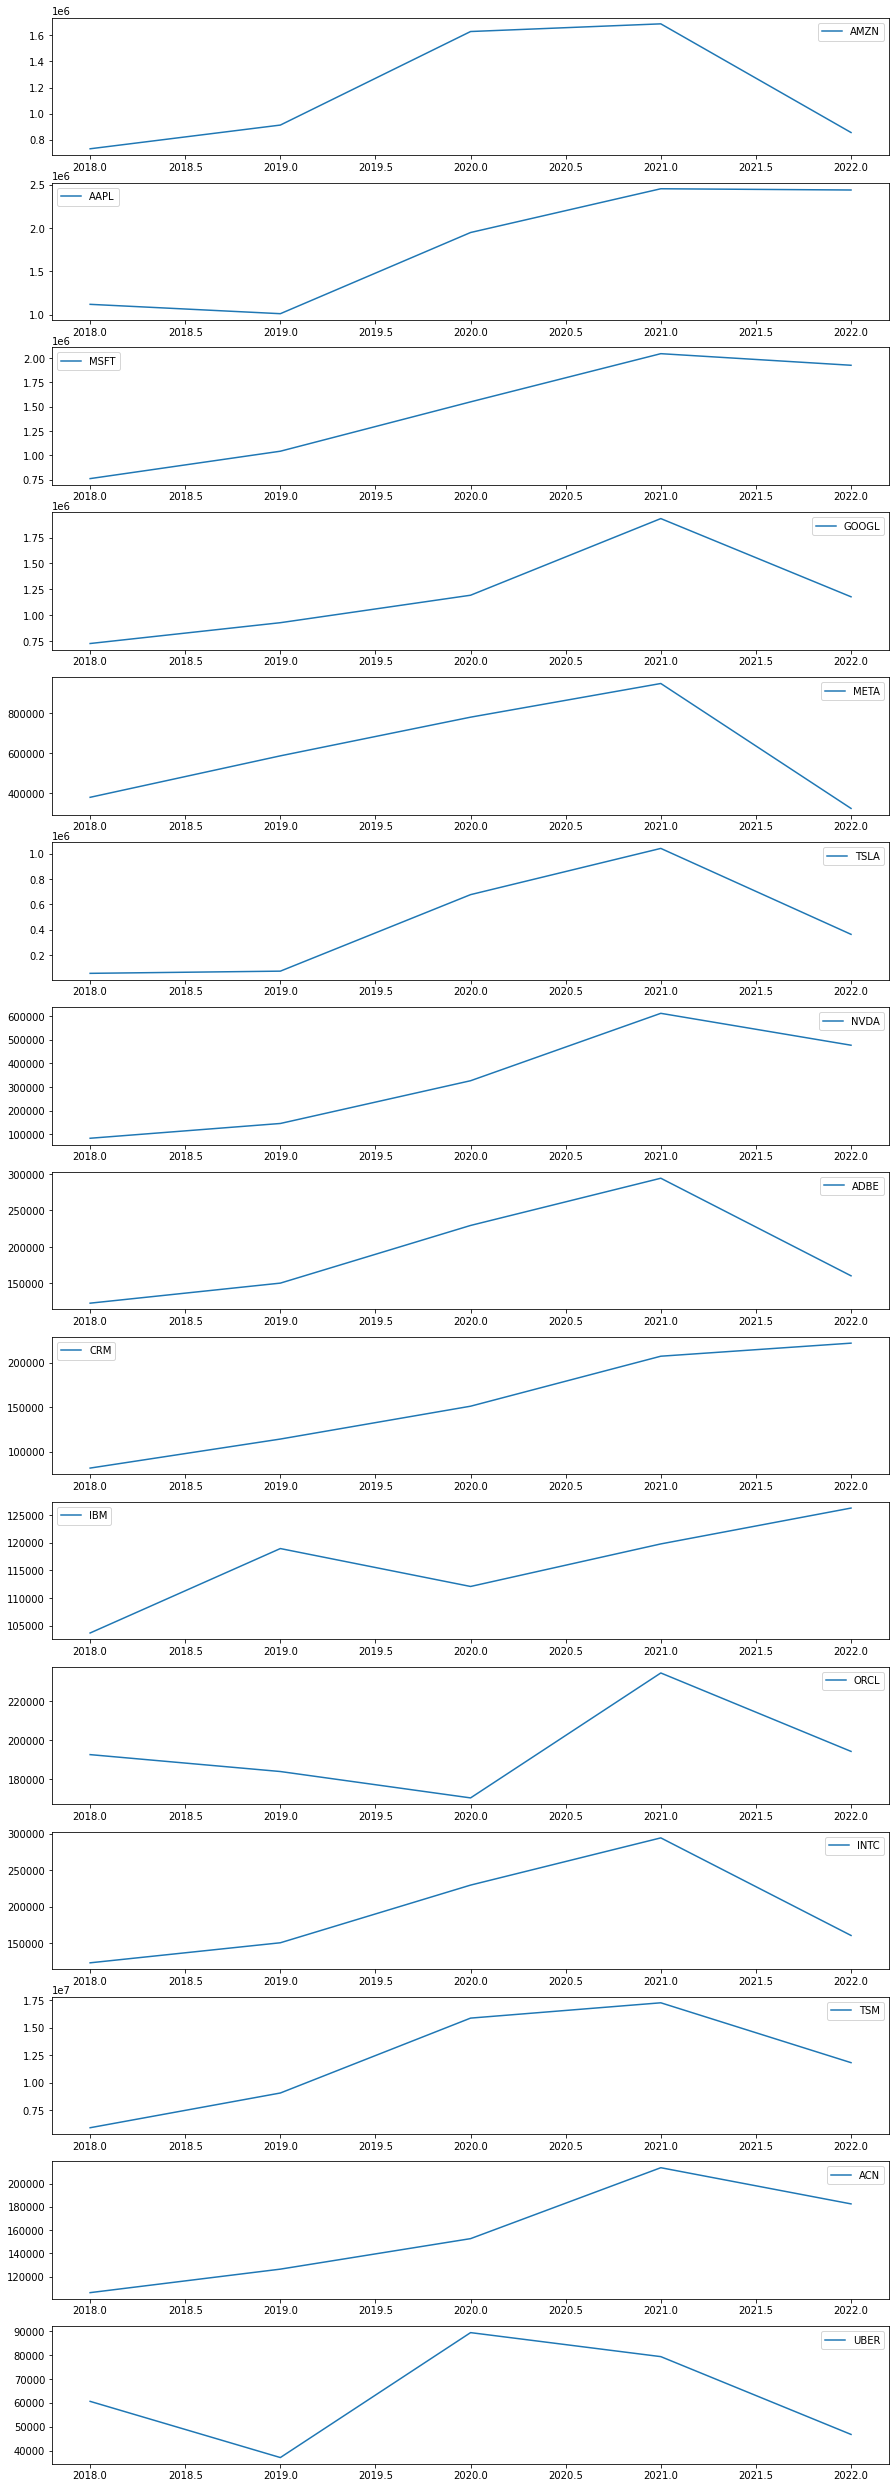

In [ ]:
for i,df in enumerate(fin_dfs):
  plt.subplot(len(fin_dfs),1,i+1)
  plt.plot(df.index, df['Mkt Cap'], label=companies[i])
  plt.legend()
  
plt.rcParams["figure.figsize"] = (15,45) 
plt.show()

## Modelado de Series de Tiempo Financieras

In [ ]:
MSFT

In [ ]:
df= MSFT.copy()

df.index = pd.to_datetime(df.index)

df = df.resample('M').last()
#df = df.fillna(method='ffill')

#df.index = pd.date_range(start=df.index.min(), end=df.index.max(), freq='W')


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_results= seasonal_decompose(df['adj_close'])
decomposition_results.plot()
plt.rcParams["figure.figsize"] = (15,12) 

plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


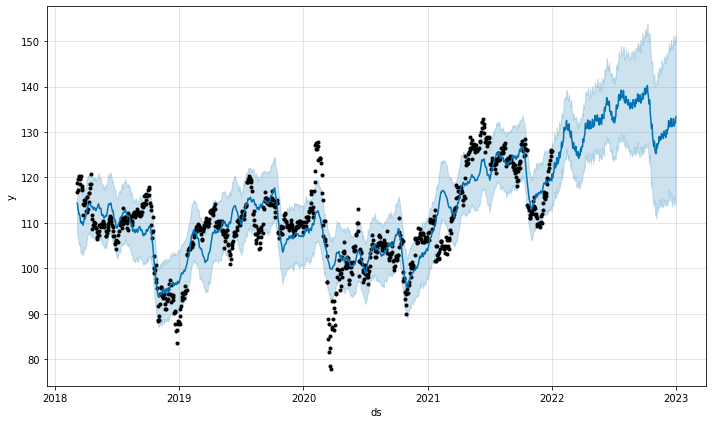

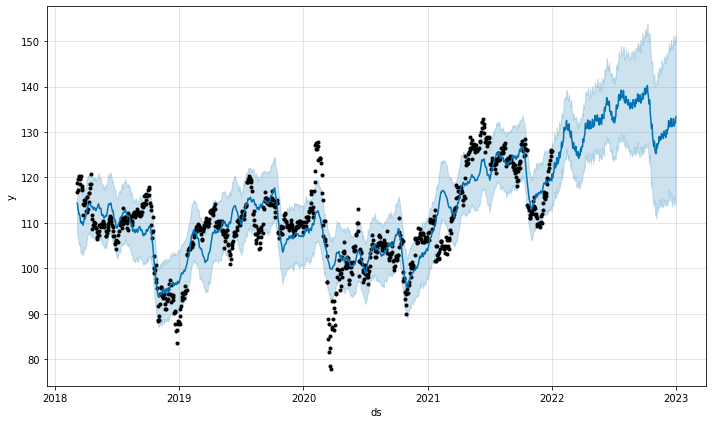

In [ ]:
df = IBM.copy()
df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date': 'ds', 'adj_close':'y'}, inplace =True)
df = df.loc[:,['ds', 'y']]

train_indices = df.ds.apply(lambda x: x.year).values < 2022
df_train = df.loc[train_indices].dropna()
df_test = df.loc[~train_indices].reset_index(drop=True)

model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model_prophet.fit(df_train)

df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred)

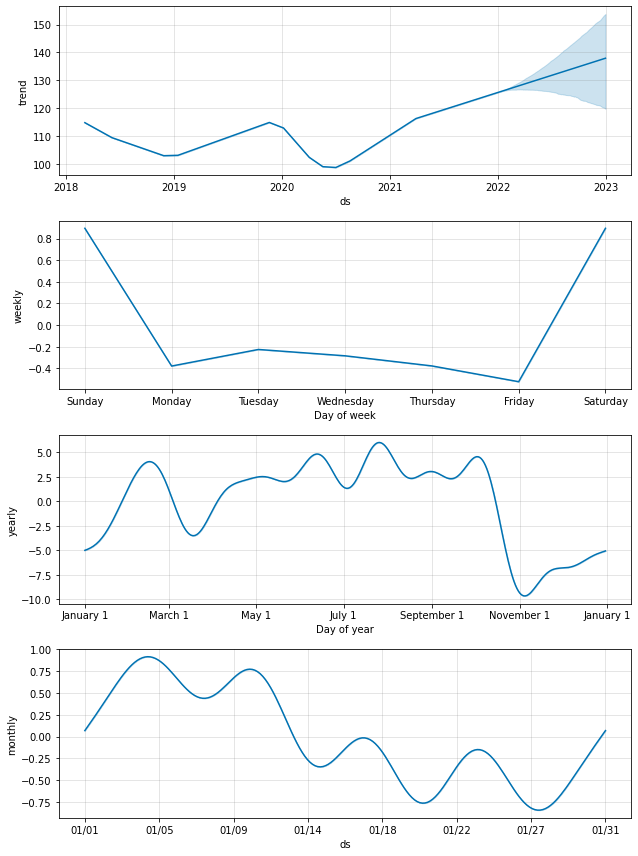

In [ ]:
from fbprophet.forecaster import plot_components
model_prophet.plot_components(df_pred)
plt.show()

In [ ]:
columns_sel= ['ds', 'yhat_lower', 'yhat_upper', 'yhat']
df_pred = df_pred.loc[:, columns_sel].reset_index(drop=True)
df_test = df_test.merge(df_pred, on=['ds'], how='left')
df_test.ds =pd.to_datetime(df_test.ds)
df_test.set_index('ds', inplace=True)
df_test



,y,yhat_lower,yhat_upper,yhat
ds,,,,
2022-01-03,128.03922,113.77434,126.78791,119.89250
2022-01-04,129.90277,113.76856,127.04218,120.43445
2022-01-05,130.09100,114.33140,127.16239,120.76093
2022-01-06,127.38039,114.92509,128.03593,121.06754
2022-01-07,126.90037,114.91395,128.26007,121.33820
...,...,...,...,...
2023-02-27,130.49001,NaN,NaN,NaN
2023-02-28,129.30000,NaN,NaN,NaN
2023-03-01,128.19000,NaN,NaN,NaN


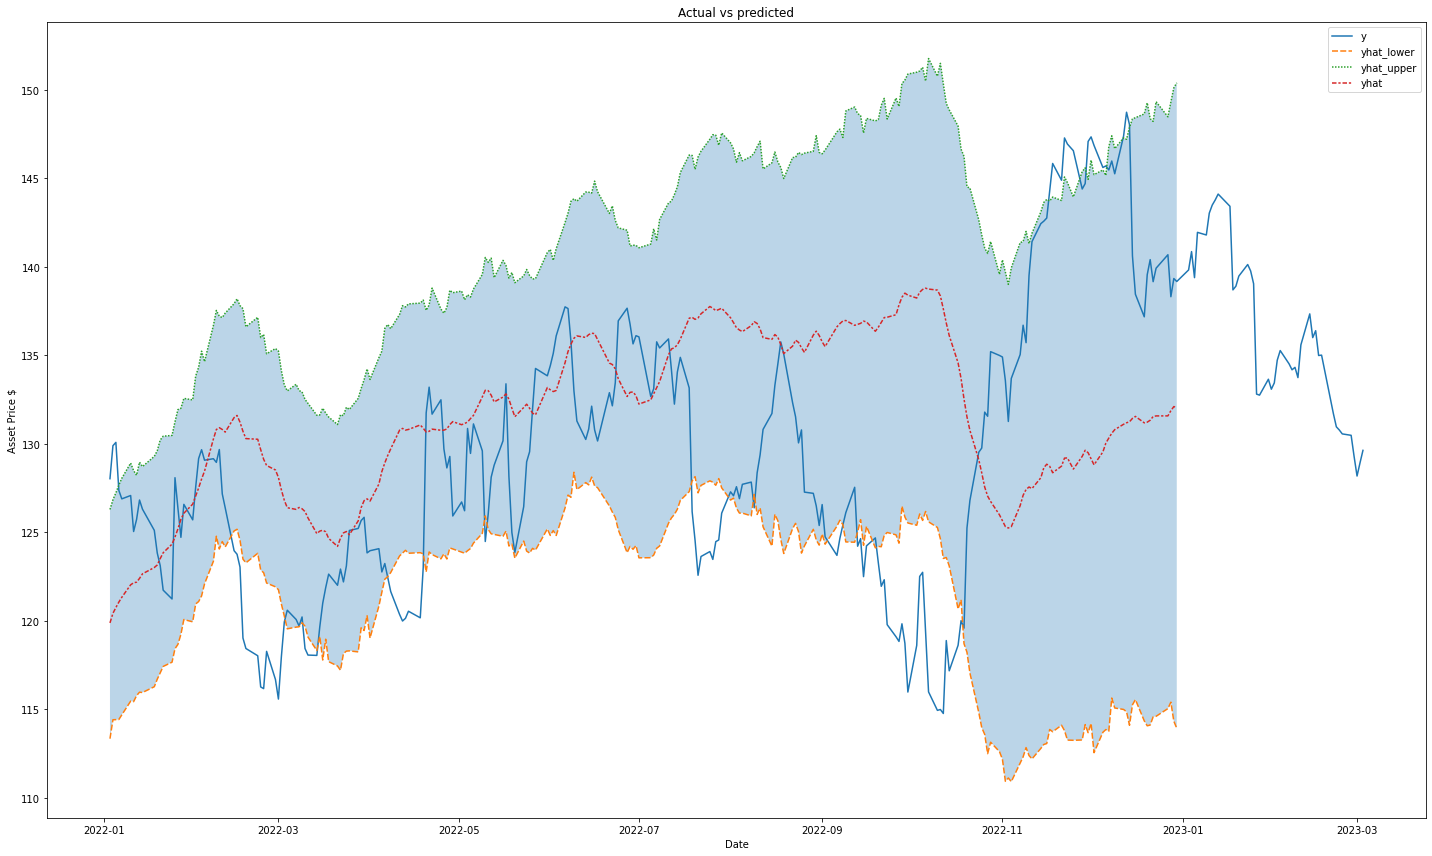

In [ ]:
fig, ax = plt.subplots(1,1)

ax = sns.lineplot(data= df_test[['y','yhat_lower', 'yhat_upper', 'yhat']])
ax.fill_between(df_test.index,
                df_test.yhat_lower,
                df_test.yhat_upper,
                alpha=0.3)
ax.set(title='Actual vs predicted',
       xlabel='Date',
       ylabel='Asset Price $')
plt.tight_layout()
plt.rcParams["figure.figsize"] = (20,12) 

